In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.Fare.sum()

28693.9493

In [6]:
train['Fare'].groupby(train['Sex']).mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train["Age"].fillna(train["Age"].mean(),inplace=True )

In [9]:
train["Embarked"].fillna('S' ,inplace=True )

In [10]:
train.loc[1:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q


In [11]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


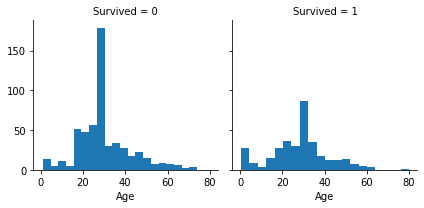

In [12]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [13]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


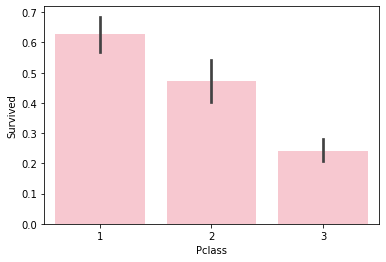

In [14]:
sns.barplot('Pclass', 'Survived', data=train, color="pink")
plt.show()

In [15]:
train.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [16]:
train.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [17]:
train.drop(['PassengerId','Cabin','Ticket','Name'], axis=1,inplace=True)

In [18]:
x=train.drop(['Survived'], axis=1)

In [19]:
y=train['Survived']

In [20]:
#below this is modelling

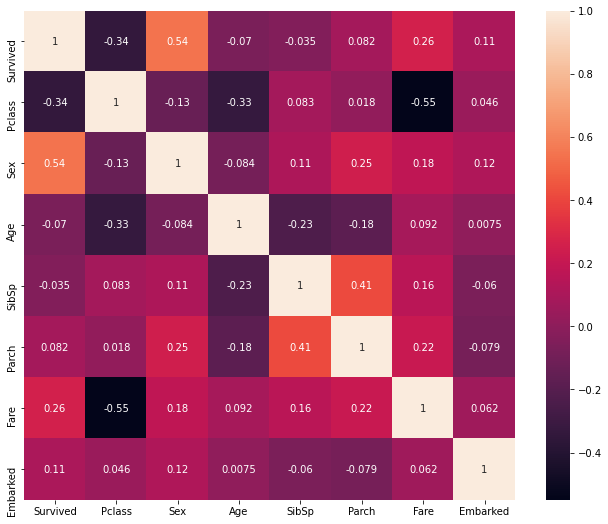

In [21]:
corrMatrix = train.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.metrics import confusion_matrix,log_loss

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

98.03

In [27]:
model_dt = tree.DecisionTreeClassifier(criterion= "entropy")
model_dt = model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
dtc_accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy=",dtc_accuracy)

accuracy= 78.77094972067039


In [28]:
model_dt2 = tree.DecisionTreeClassifier()
model_dt2 = model_dt2.fit(x_train, y_train)
y_pred = model_dt2.predict(x_test)
dtc_accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy=",dtc_accuracy)

accuracy= 80.44692737430168


[Text(1431.4660799050635, 1065.4560000000001, 'X[1] <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(555.5903876582279, 1021.9680000000001, 'X[2] <= 6.5\nentropy = 0.694\nsamples = 467\nvalue = [380, 87]'),
 Text(188.35443037974684, 978.48, 'X[3] <= 2.5\nentropy = 0.902\nsamples = 22\nvalue = [7, 15]'),
 Text(164.81012658227849, 934.9920000000001, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(211.8987341772152, 934.9920000000001, 'X[4] <= 1.5\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(188.35443037974684, 891.504, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(235.44303797468356, 891.504, 'X[3] <= 4.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(211.8987341772152, 848.0160000000001, 'X[2] <= 3.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(188.35443037974684, 804.528, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(235.44303797468356, 804.528, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(258.9873417721519, 848.

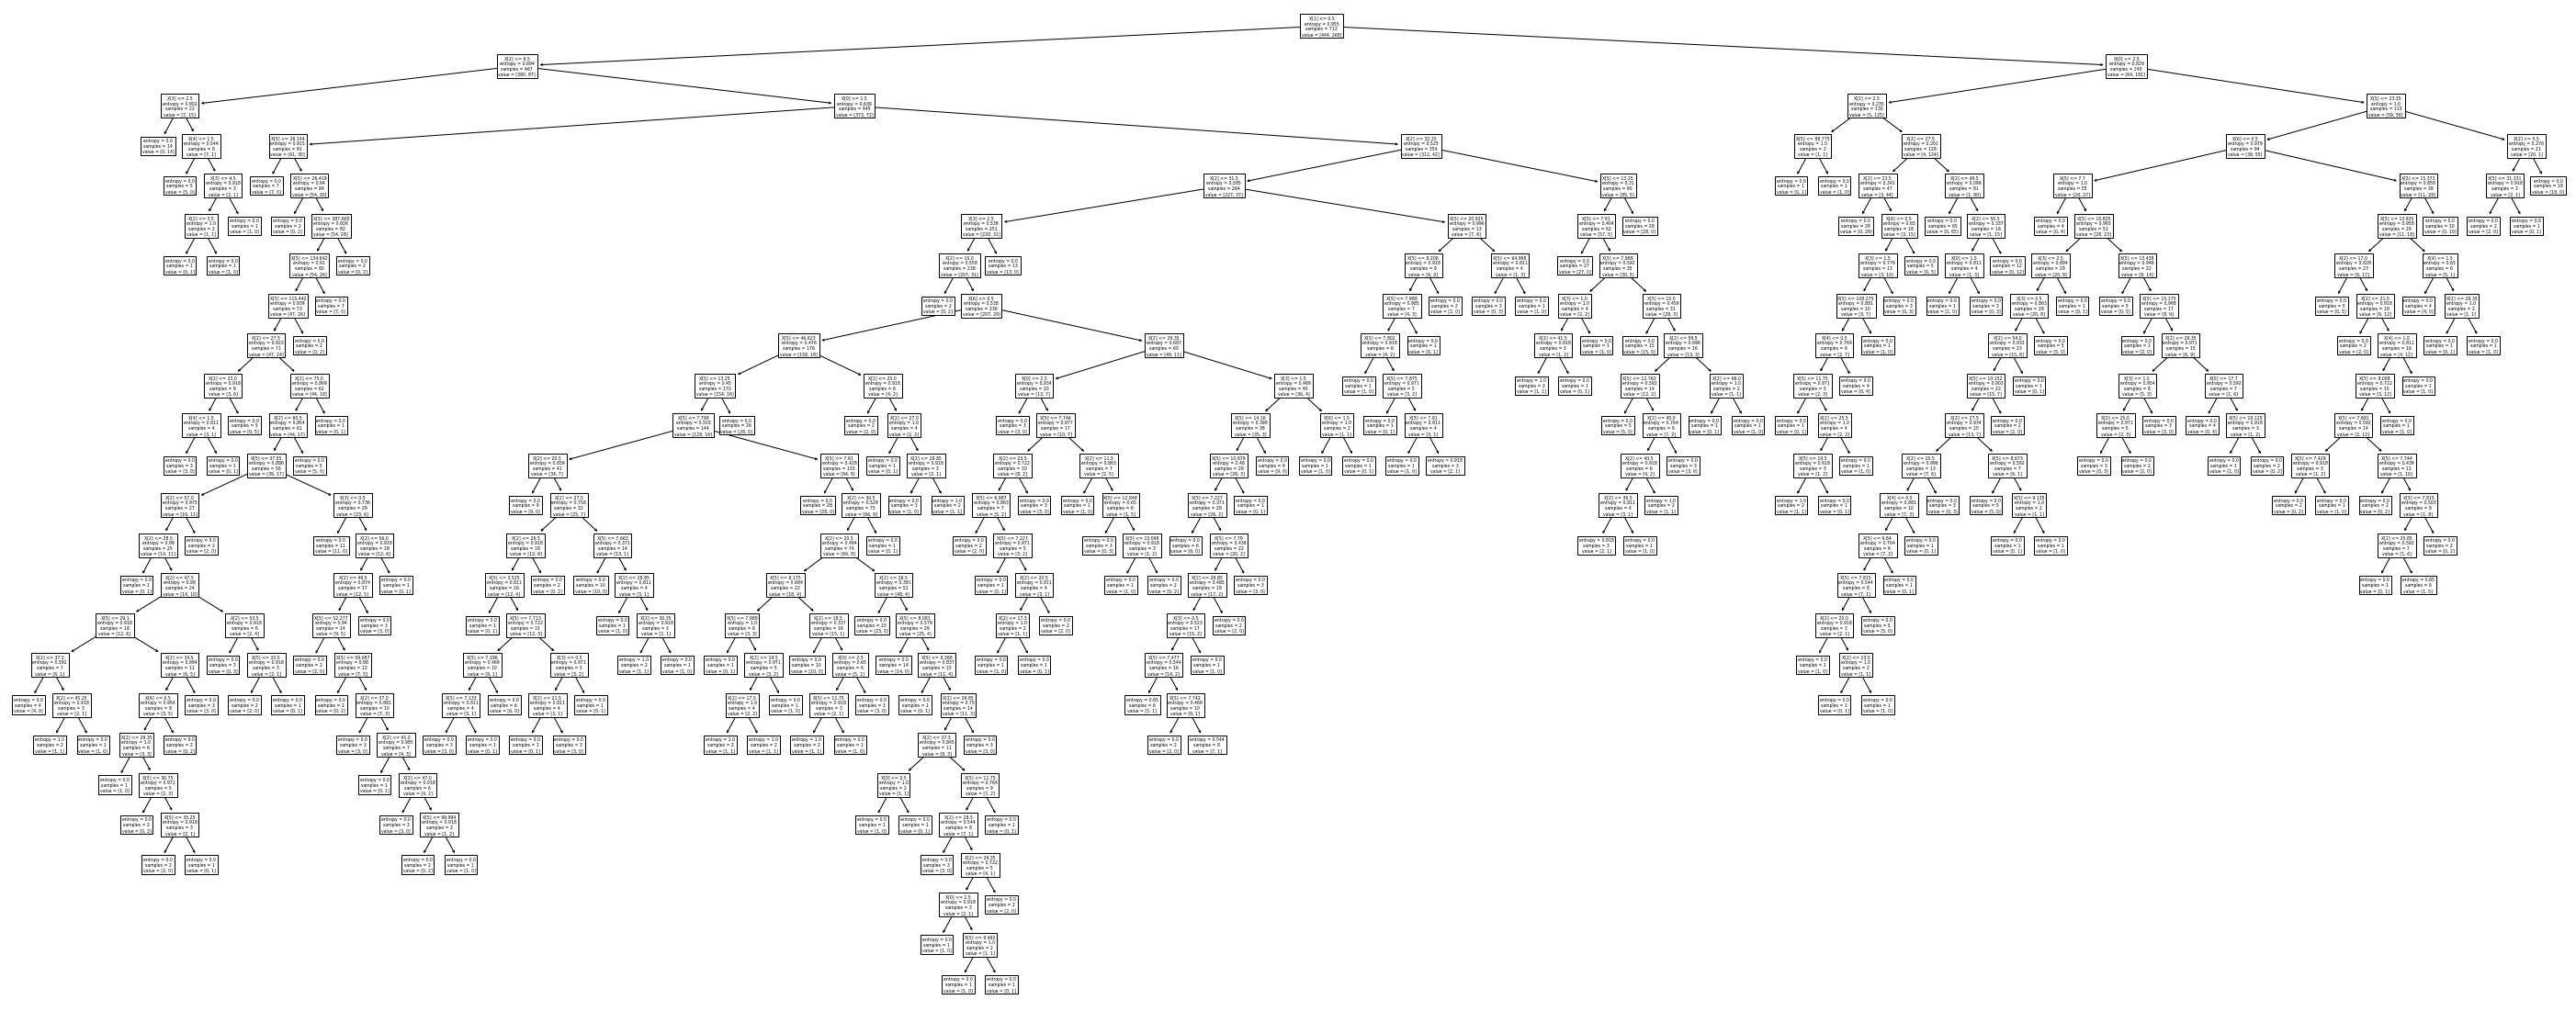

In [29]:
plt.figure(figsize=(50,20))
tree.plot_tree(model_dt.fit(x_train, y_train))

[Text(353.4561434659091, 531.2454545454545, 'X[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(139.40092329545456, 506.53636363636366, 'X[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(34.24090909090909, 481.82727272727277, 'X[3] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(29.16818181818182, 457.1181818181818, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(39.31363636363637, 457.1181818181818, 'X[2] <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(34.24090909090909, 432.40909090909093, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(44.38636363636364, 432.40909090909093, 'X[5] <= 31.331\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(39.31363636363637, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(49.45909090909091, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(244.56093750000002, 481.82727272727277, 'X[0] <= 1.5\ngini = 0.271\nsamples = 445\nvalue = [373, 72]')

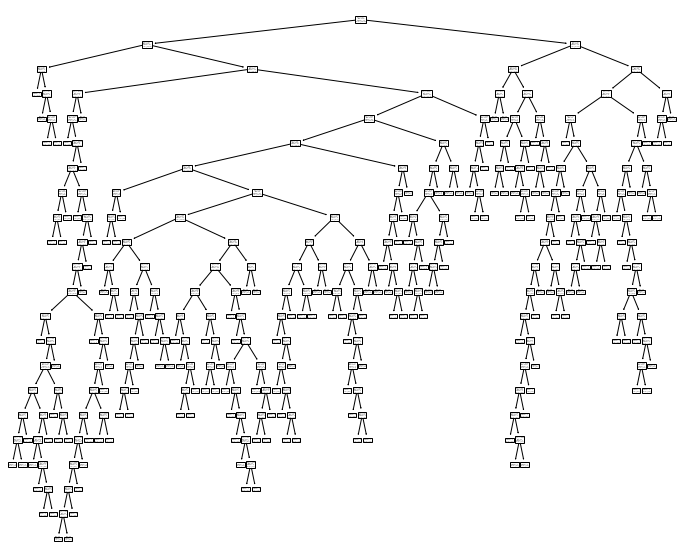

In [30]:
plt.figure(figsize=(12,10))
tree.plot_tree(model_dt2.fit(x_train, y_train))

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
train[train.columns] = scaler.fit_transform(train)

In [34]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.5
2,1.0,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0
3,1.0,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0
887,1.0,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0
888,0.0,1.0,1.0,0.367921,0.125,0.333333,0.045771,0.0
889,1.0,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.5


In [35]:
#Logistic Regression
#Important Parameters - C , penalty , solver ,
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400 , penalty= 'l1' , solver = 'liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = model.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred)*100
lr_accuracy

79.88826815642457

In [37]:
y_pred=model.predict(x_test)
lr_log_loss=log_loss(y_test,y_pred)*10
lr_log_loss

69.46417562992556

In [38]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = model.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

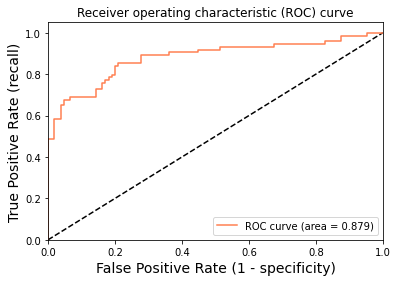

In [39]:
idx = np.min(np.where(tpr > 0.95))
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [40]:
conf_mat = confusion_matrix(y_test.tolist() , y_pred )
print(conf_mat)

[[89 16]
 [20 54]]


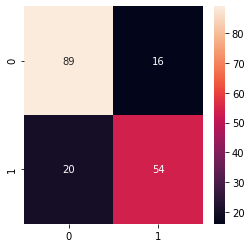

In [41]:
plt.figure(figsize=(4,4))
sns.heatmap(conf_mat,annot=True)
plt.show()